In [160]:
import pandas as pd 
import numpy as np 
import warnings 
warnings.simplefilter("ignore")

In [116]:
# Loading the dataset 
df = pd.read_csv('ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Exploring the dataset 

In [82]:
df.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.shape

(76014, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


## Data Cleaning 
Points covered under this section:
- Removing unwanted columns
- Keeping only consistent teams
- Removing the first 5 over data in every match
- Converting the column 'date' from string into datetime object 

In [10]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [119]:
# Removing unwanted columns 
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print("Before removing unwanted columns: {}".format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print("After removing unwanted columns: {}".format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [21]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [20]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [22]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [23]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [120]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad',   ]

In [121]:
# Keeping only consistent teams 
print("Before removing inconsistent teams: {}".format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print("After removing inconsistent teams: {}".format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [122]:
# Removing the first 5 overs data in every match 
print ("Before removing first 5 over data: {}".format(df.shape))
df = df[df['overs'] >= 5.0]
print ("After removing first 5 over data: {}".format(df.shape))

Before removing first 5 over data: (53811, 9)
After removing first 5 over data: (40108, 9)


In [123]:
# Converting the column 'date' from string into datetime object 
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0, 0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0, 0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


                    runs   wickets     overs  runs_last_5  wickets_last_5  \
runs            1.000000  0.359222  0.879575     0.584435        0.115359   
wickets         0.359222  1.000000  0.635803    -0.203286        0.633125   
overs           0.879575  0.635803  1.000000     0.286564        0.221914   
runs_last_5     0.584435 -0.203286  0.286564     1.000000       -0.276398   
wickets_last_5  0.115359  0.633125  0.221914    -0.276398        1.000000   
total           0.391254 -0.457055  0.028468     0.587091       -0.297397   

                   total  
runs            0.391254  
wickets        -0.457055  
overs           0.028468  
runs_last_5     0.587091  
wickets_last_5 -0.297397  
total           1.000000  


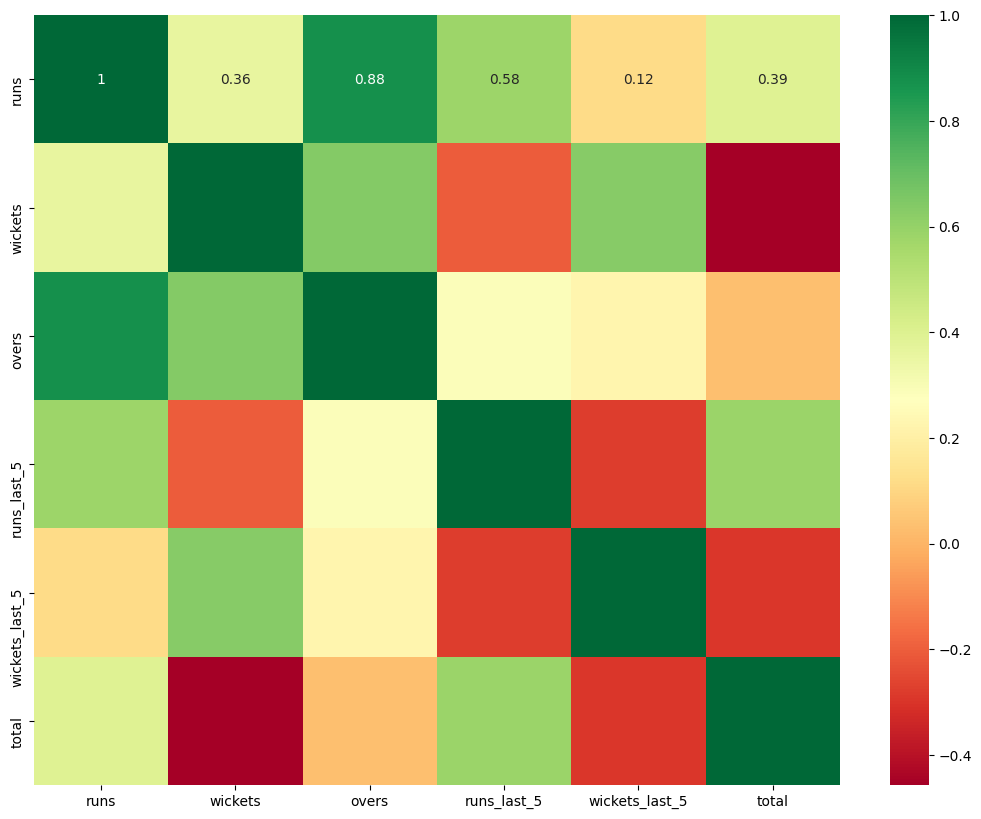

In [110]:
# Selecting correlated features using Heatmap 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Get correlation of all the feature of the dataset 
corr_matrix  = df.select_dtypes(np.number).corr()
print(corr_matrix)

top_corr_features = corr_matrix.index

# Plotting the heatmap 
plt.figure(figsize=(13, 10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

## Data  Preprocessing 
- Handling categorical features
- Splitting dataset into train and test set on the basis of date 

In [126]:
# Splitting the data into train and test set based on the year
X_train = df.drop(labels='total', axis=1)[df['date'].dt.year <= 2016]
X_test = df.drop(labels='total', axis=1)[df['date'].dt.year >= 2017]

y_train = df[df['date'].dt.year <= 2016]['total'].values
y_test = df[df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Specify categorical columns
categorical_columns = ['bat_team', 'bowl_team']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # sparse=False to return a dense array, drop='first' to avoid dummy variable trap

# Fit and transform the training data
encoded_train_array = encoder.fit_transform(X_train[categorical_columns])

# Transform the testing data
encoded_test_array = encoder.transform(X_test[categorical_columns])

# Convert the encoded arrays to DataFrames
encoded_train_df = pd.DataFrame(encoded_train_array, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test_array, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded DataFrames with non-categorical DataFrames
X_train_non_categorical = X_train.drop(categorical_columns, axis=1).reset_index(drop=True)
X_test_non_categorical = X_test.drop(categorical_columns, axis=1).reset_index(drop=True)

# Resetting indices to avoid misalignment issues
encoded_train_df.reset_index(drop=True, inplace=True)
encoded_test_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
X_train_encoded = pd.concat([X_train_non_categorical, encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test_non_categorical, encoded_test_df], axis=1)

# Check for NaN values
print(X_train_encoded.isna().sum())
print(X_test_encoded.isna().sum())

# Display the encoded DataFrames
print(X_train_encoded.head())
print(X_test_encoded.head())

# Display the shapes to verify everything is correct
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train = X_train_encoded.copy()
X_test = X_test_encoded.copy()

/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


runs                                     0
wickets                                  0
overs                                    0
runs_last_5                              0
wickets_last_5                           0
bat_team_Delhi Daredevils                0
bat_team_Kings XI Punjab                 0
bat_team_Kolkata Knight Riders           0
bat_team_Mumbai Indians                  0
bat_team_Rajasthan Royals                0
bat_team_Royal Challengers Bangalore     0
bat_team_Sunrisers Hyderabad             0
bowl_team_Delhi Daredevils               0
bowl_team_Kings XI Punjab                0
bowl_team_Kolkata Knight Riders          0
bowl_team_Mumbai Indians                 0
bowl_team_Rajasthan Royals               0
bowl_team_Royal Challengers Bangalore    0
bowl_team_Sunrisers Hyderabad            0
dtype: int64
runs                                     0
wickets                                  0
overs                                    0
runs_last_5                              

## Model Building 
I will experiment with different algorithms, they are as follows:
- Linear Regression
- Decision Tree Regression
- Random Forest Regression

- ---- Boosting Algorithm ----
- Adaptive Boosting (AdaBoost Algorithm)

## Linear Regression 

In [127]:
X_train

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,61,0,5.1,59,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,61,1,5.2,59,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,61,1,5.3,59,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,61,1,5.4,59,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,61,1,5.5,58,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37325,194,7,19.2,54,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37326,200,7,19.3,56,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37327,201,7,19.4,56,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37328,202,7,19.5,57,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [129]:
# Predicting results 
y_pred_lr = linear_regressor.predict(X_test)

In [130]:
# Linear Regression - Model Evaluation 
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - model Evaluation ---- ")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Square Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - model Evaluation ---- 
Mean Absolute Error (MAE): 12.118617546193335
Mean Square Error (MSE): 251.00792310417137
Root Mean Squared Error (RMSE): 15.84322956673201


## Decision Tree

In [131]:
# Decision Tree Regression Model 
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
# Predicting results 
y_pred_dt = decision_regressor.predict(X_test)

In [134]:
# Decision Tree  Regression - Model Evaluation 

print("---- Linear Regression - model Evaluation ---- ")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Square Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Linear Regression - model Evaluation ---- 
Mean Absolute Error (MAE): 16.125989920806337
Mean Square Error (MSE): 478.5370770338373
Root Mean Squared Error (RMSE): 21.875490326706675


## Random Forest 

In [137]:
# Random Forest Regression model 
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor() 
random_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [138]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [139]:
# Random Forest Regression - Model Evaluation 

print("---- Linear Regression - model Evaluation ---- ")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Square Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Linear Regression - model Evaluation ---- 
Mean Absolute Error (MAE): 13.832550150533411
Mean Square Error (MSE): 336.36918786467635
Root Mean Squared Error (RMSE): 18.340370439679685


Note: Since Linear regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm
## AdaBoost Algorithm

In [140]:
# AdaBoost model using Linear Regression as the base learner 
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [145]:
# Predicting results 
y_pred_adb = adb_regressor.predict(X_test)

In [146]:
# AdaBoost Regression - Model Evaluation 
print("---- Linear Regression - model Evaluation ---- ")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Square Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- Linear Regression - model Evaluation ---- 
Mean Absolute Error (MAE): 12.11280417357892
Mean Square Error (MSE): 246.5266176217902
Root Mean Squared Error (RMSE): 15.701166122991955


Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will you simple linear regression model for prediction 
## Predictions 
- Model trained on the data from **IPL Seasons 1 to 9** ie:(2008 to 2016)
- Model tested on data from **IPL Season 10** ie: (2017)
- Model predicts on data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [151]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,1]

    # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])


## Prediction 1 
- Date 16th April 2018
- IPL: Season 11
- Match number: 13
- Teans: kolkata Knight Riders vs Delhi Daredevils
- First Inngings final score: 200/9

In [152]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))
     

The final predicted score (range): 152 to 167


/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prediction 2
- Date: 7th May 2018
- IPL : Season 11
- Match number: 39
- Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore
- First Innings final score: 146/10

In [153]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))
     

The final predicted score (range): 140 to 155


/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prediction 3
- Date: 17th May 2018
- IPL : Season 11
- Match number: 50
- Teams: Mumbai Indians vs. Kings XI Punjab
- First Innings final score: 186/8

In [154]:

final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))
     

The final predicted score (range): 145 to 160


/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prediction 5
- Date: 11th April 2019
- IPL : Season 12
- Match number: 25
- Teams: Rajasthan Royals vs. Chennai Super Kings
- First Innings final score: 151/7

In [155]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 129 to 144


/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prediction 6
- Date: 14th April 2019
- IPL : Season 12
- Match number: 30
- Teams: Sunrisers Hyderabad vs. Delhi Daredevils
- First Innings final score: 155/7

In [156]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 147 to 162


/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prediction 7
- Date: 10th May 2019
- IPL : Season 12
- Match number: 59 (Eliminator)
- Teams: Delhi Daredevils vs. Chennai Super Kings
- First Innings final score: 147/9

In [157]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))
     

The final predicted score (range): 142 to 157


/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
